 # Data Wrangling

In [69]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset loaded in
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Analyze the DataSet

In [72]:
# Data Set inspection
df.shape
# Looking for Missing Values
df.info()
# Data Statistics
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# DATA CLEANING

In [76]:
# Handling the missing values in TotalCharges
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan).astype(float)

# Add 0's for missing TotalCharges 
df['TotalCharges'] = df['TotalCharges'].fillna(0)

# Convert SeniorCitizen from int to categorical to identify the Category of individual citizens 
df['SeniorCitizen'] = df['SeniorCitizen'].map({0: 'No', 1: 'Yes'})
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,NaN,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,NaN,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,NaN,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,NaN,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,NaN,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,NaN,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,NaN,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,NaN,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,NaN,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


## Converted columns to categorical to optimize the dataset before further analysis


In [80]:
categories = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
            'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
            'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
            'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
# Turned each column into categorical variables based on (Yes, No).
for col in categories:
    df[col] = df[col].astype('category')
df[col]

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: category
Categories (2, object): ['No', 'Yes']

 ## Box plot created for numerical columns of outliers

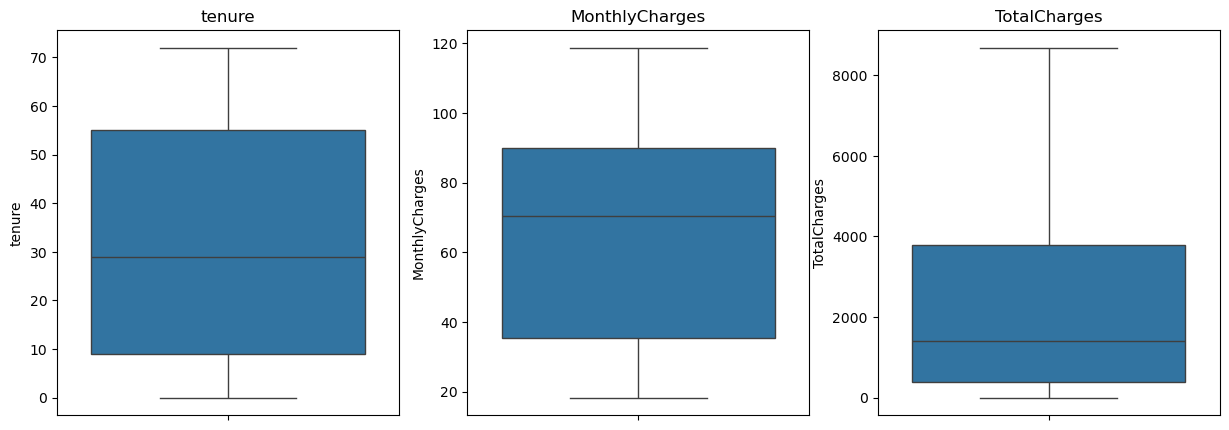

In [83]:
# Wanted to Analyize the tenure, monthlycharge, and totalcharges to get an idea of the average charges.
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
# looping through the num_cols columns
for x, col in enumerate(num_cols):
    # A boxplot is created for each 'x' subplot
    sns.boxplot(data=df, y=col, ax=axes[x])
    # title
    axes[x].set_title(col)
# Show the plot
plt.show()

## Box Plot Analysis
The median tenure of 29 months shows that half of the customers stay for less than 2.5 years. A median monthly charge of 70 suggests that pricing is typically mid-range, while the median total spend of 1,000 indicates that most customers contribute a modest lifetime value before possibly churning.

# Customer Segmentation Based on Tenure

In [93]:
# I grouped the customers into categories based on the tenure for the years instead of the values.
# I created unique bins correlating with each of the years.
bins = [-1, 12, 24, 36, 48, 60, 72]
labels = ['0-1yr', '1-2yr', '2-3yr', '3-4yr', '4-5yr', '5-6yr']
# I then grouped each of the tenures, using the cut function I can turn the numerical data into unique variables so I can categorize the numerical
# column easier for instance tensure.
df['tenure_group'] = pd.cut(df['tenure'], bins=bins, labels=labels)

# I want to create a column that indicates what customers use none of the additional services.
services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
# The new column is if the customer says no to all of these services, then NoAddServices is 1, or else it is 0. 
# Returns True if the customer answered No for that particular service.
df['NoAddServices'] = (df[services] == 'No').all(axis=1).astype(int)

# I then assign each of the customers' monthly charges at the moment as their average.
df['AvgMonthlyCharge'] = df['MonthlyCharges']  
# Looks to see if the customer has any tensure, being that they worked for the company for at least 1 month. So I do not divide by 0.
some_tensure = df['tenure'] > 0  
# For customers that dont have 0 tensure, I calcualted the total monthly charge to give a more real scenario regarding their monthly spending.
# By dividing their TotalCharges by the tenure.
df.loc[some_tensure, 'AvgMonthlyCharge'] = df['TotalCharges'] / df['tenure']

# I created an interaction feature between InternetService and Contract to obtain a better analysis if possible.
# I converted the InternetService and Contract into strings and seperated by an underscore to better understand how 
# these combinations impact churn, and making it easier when creating my machine learning models. 
df['InternetContract'] = df['InternetService'].astype(str) + "_" + df['Contract'].astype(str)

# Results
print(df['tenure_group'])
print(df['AvgMonthlyCharge'])
print(df['InternetContract'])

0       0-1yr
1       2-3yr
2       0-1yr
3       3-4yr
4       0-1yr
        ...  
7038    1-2yr
7039    5-6yr
7040    0-1yr
7041    0-1yr
7042    5-6yr
Name: tenure_group, Length: 7043, dtype: category
Categories (6, object): ['0-1yr' < '1-2yr' < '2-3yr' < '3-4yr' < '4-5yr' < '5-6yr']
0        29.850000
1        55.573529
2        54.075000
3        40.905556
4        75.825000
           ...    
7038     82.937500
7039    102.262500
7040     31.495455
7041     76.650000
7042    103.704545
Name: AvgMonthlyCharge, Length: 7043, dtype: float64
0               DSL_Month-to-month
1                     DSL_One year
2               DSL_Month-to-month
3                     DSL_One year
4       Fiber optic_Month-to-month
                   ...            
7038                  DSL_One year
7039          Fiber optic_One year
7040            DSL_Month-to-month
7041    Fiber optic_Month-to-month
7042          Fiber optic_Two year
Name: InternetContract, Length: 7043, dtype: object


### Post Processing

Customers are classified into tenure categories such as "0-1yr," "2-3yr," and "5-6yr" based on the results, some of the customers do not engage with additional services (NoAddServices = 1). The InternetContract feature combines internet service types and contract lengths such as 'DSL_Month-to-month'and 'Fiber optic_One year'. The average monthly charge (AvgMonthlyCharge) ranges from 29.85 to 103.20. This suggests that they have distinct churn risks and service usage trends.